# Lab01: Linear Regression

- Student ID: 20127370 
- Student name: Mai Quý Trung

**How to do your homework**


You will work directly on this notebook; the word `TODO` indicates the parts you need to do.

You can discuss ideas with classmates as well as finding information from the internet, book, etc...; but *this homework must be your*.

**How to submit your homework**

Before submitting, rerun the notebook (`Kernel` ->` Restart & Run All`).

Rename your notebook with `ID.ipynb` (for example, if your ID is 1234567, rename your notebook with `1234567.ipynb`) and submit it on moodle.

**Contents:**

- Linear Regression.

### 1. The hypothesis set

- Linear regression is a **linear model**, e.g. a model that assumes a linear relationship between input variables (x) and the single output variable (y). More specifically, that y can be calculated from a linear combination of the input variables (x).
- Generally, a linear model will make predictions by calculating a weighted sum of the input features (independent variables). $$\hat{y} = w_0 + w_1x_1 + w_2x_2 + \dots + w_nx_n$$

    - $\hat{y}$ is the predicted value.
    - $n$ is the number of features.
    - $x_i$ is the $i^{th}$ feature value.
    - $w_j$ is the $j^{th}$ model parameter (including the bias term $w_0$ and the feature weights $w_1,w_2,...w_n$).

- In other words, the equation above can be re-written as follows: $$\hat{y}=h_{\mathbf{w}}\left(\mathbf{x}\right)=\mathbf{w}^{T}\cdot\mathbf{x}$$

    - $\mathbf{w}$ is the model **parameter vector** (including the bias term $w_0$ and the feature weights $w_1,w_2,...w_n$).
    - $\mathbf{w}^T$ is a transpose  of $\mathbf{w}$ (a row vector insteade of column vector).
    - $\mathbf{x}$ is the instance's **feature vector**, *containing* $x_0$ to $x_n$, with $x_0$ *always equal to* 1.
    - $\mathbf{w}^{T}\cdot\mathbf{x}$ is the dot product of $\mathbf{w}^T$ and $\mathbf{x}$.
    - $h_{\mathbf{w}}$ is the hypothesis function, using the parameters $\mathbf{w}$.
![Bias](Bias.png)

### 2. Performance measure and the learning goal

- Before we start to train the model, we need to determine how good the model fits the training data. There are a couple of ways to determine the level of quality, but we are going to use the most popular one and that is the **MSE** (Mean Square Error). We need to find the value for $\mathbf{w}$ that will minimize the MSE:
$$\mathbf{w}=\arg\min MSE_{\mathcal{D}_{train}}$$


- MSE on the train set $\mathcal{D}_{train}$ denoted as $\left(\mathbf{X},\mathbf{y}\right)$ including m samples $\left\{\left(\mathbf{x}_1,y_1\right),\left(\mathbf{x}_2,y_2\right),...\left(\mathbf{x}_m,y_m\right)\right\}$

$$MSE\left(X,h_{\mathbf{w}}\right)=\dfrac{1}{m}\sum_{i=1}^{m}\left(\mathbf{w}^T\cdot\mathbf{x}_i - y_i\right )^2$$
$$MSE\left(X,h_{\mathbf{w}}\right)=\dfrac{1}{m}\Vert\mathbf{X}\mathbf{w}-\mathbf{y}\Vert^2$$

Example below is a plot of an MSE function where the true target value is 100, and the predicted values range between -10,000 to 10,000. The MSE loss (Y-axis) reaches its minimum value at prediction (X-axis) = 100. The range is 0 to ∞.

![Plot of MSE Loss (Y-axis) vs. Predictions (X-axis)](MSE.png)

- To find the value of $\mathbf{w}$ that minimizes the MSE cost function, the most common way (*we have known since high school*) is to solve the derivative (gradient) equation. 
$$\mathbf{\hat{w}}=\left(\mathbf{X}^T  \mathbf{X}\right)^{\dagger}  \mathbf{X}^T  \mathbf{y}$$
  - $\mathbf{\hat{w}}$ is the value of $\mathbf{w}$ that minimizes the cost function
  - **Notice that** $\mathbf{X}^T  \mathbf{X}$ is not always invertible. $\left(\mathbf{X}^T  \mathbf{X}\right)^{\dagger}$ is pseudo-inverse of $\left(\mathbf{X}^T \mathbf{X}\right)$ - a general case of inverse when the matrix is not invertible or not even square.

### 3. Implementation 

#### Import Library

In [1]:
using LinearAlgebra
using Plots
gr()

# import your libraries if needed

Plots.GRBackend()

#### Create data

In [2]:
X = rand(1:100, 100)
global a = rand(1:5, 1)[1]
global b = rand(1:5, 1)[1]

f(x) = a*x + b + rand(1:30,1)[1]
y = f.(X);
print("Your regression function: y = $a*x + $b + noise")

Your regression function: y = 2*x + 5 + noise

#### Load and visualize data

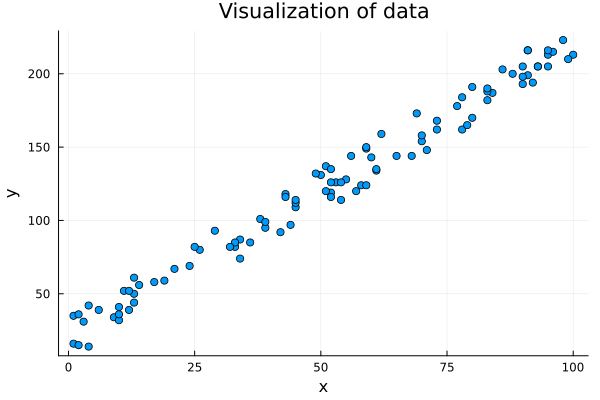

In [3]:
scatter(X, y, label="data points", xlabel="x", ylabel="y", title="Visualization of data", legend=false)

**TODO:** 

- Comment about data: The data points run through the function with different noise ratio but in general they tend to concentrate as a straight(ish) line.

#### Training function

In [4]:
function train_linear_regression(X, y)
    """
    Trains Linear Regression on the dataset (X, y).
    
    Parameters
    ----------
    X : numpy array, shape (m, d + 1)
        The matrix of input vectors (each row corresponds to an input vector); 
        the first column of this matrix is all ones (corresponding to x_0).
    y : numpy array, shape (m, 1)
        The vector of outputs.
    
    Returns
    -------
    w : numpy array, shape (d + 1, 1)
        The vector of parameters of Linear Regression after training.
    """
    # TODO
    X_pinv = inv(transpose(X) * X) * transpose(X)
    w = X_pinv * y
    
    return w
end

train_linear_regression (generic function with 1 method)

In [5]:
# Construct one_added_X 
# TODO:
# First column of one_added_X is all ones (corresponding to x_0).
one_added_X = hcat(ones(typeof(X[1]), size(X)), X)

println("one_added_X.shape =", size(one_added_X))
println("y.shape =", size(y))

one_added_X.shape =(100, 2)
y.shape =(

100,)


#### Train our model and visualize result

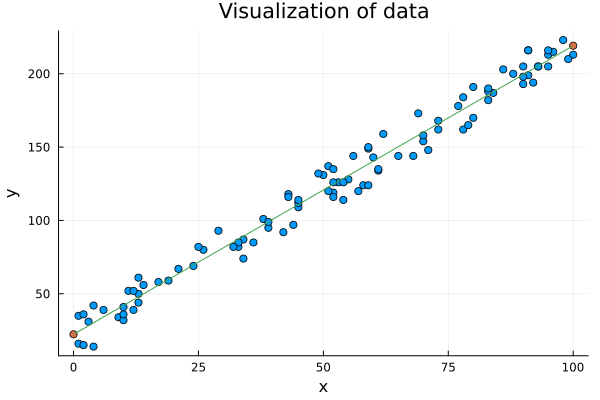

In [6]:
w = train_linear_regression(one_added_X, y)

# Visualize result
predicted_ys = one_added_X*w
scatter(X, y, xlabel="x", ylabel="y", title="Visualization of data", legend=false)
x_min = 0
x_max = 100
xs = [x_min x_max]'

# Construct one_added_xs 
# TODO:
# First column of one_added_xs is all ones (corresponding to x_0).

ones_added_xs = hcat(ones(typeof(xs[1]), size(xs)), xs)

predicted_ys = ones_added_xs*w
scatter!(xs, predicted_ys, legend=false)
plot!(xs, predicted_ys, legend=false)
